# Labeling Functions Ideas


Exploring the LFs ideas behind users meta data, propaganda techniques, and assumptions made about the task.

Focusing only on the users meta data in this file.


In [1]:
import re
import glob
import emoji
import stanza
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize

sns.set()
%matplotlib inline

## Users Meta Data


Based on the assumption that only around 6K propagandist users we released and around 12K genuine account collected, we will try to find out some boundaries between the genuine and propagandist users.

This will not be accurate but we will try to find out in the labeling functions section.


In [2]:
prop_users_data_path = "../data/raw/propaganda_users.csv"
gen_users_data_paths = "../data/raw/collected_gen/*/*User*.csv"

In [3]:
prop_users = pd.read_csv(prop_users_data_path, parse_dates=["account_creation_date"])
prop_users = prop_users.drop_duplicates(subset=["userid"])
prop_users = prop_users.drop(columns=["user_profile_url", "account_language"])
prop_users.head(2)

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,follower_count,following_count,account_creation_date
0,G4fT8DZWOhtFv3LOya6R2lu1eE1+wfBRSXAJTPBS1B4=,G4fT8DZWOhtFv3LOya6R2lu1eE1+wfBRSXAJTPBS1B4=,G4fT8DZWOhtFv3LOya6R2lu1eE1+wfBRSXAJTPBS1B4=,NaN,NaN,318,689,2014-06-12
1,jfyXQBCFWEHB6bWgH2wpi4arPEXSV7dzBLUZSiqV0KY=,jfyXQBCFWEHB6bWgH2wpi4arPEXSV7dzBLUZSiqV0KY=,jfyXQBCFWEHB6bWgH2wpi4arPEXSV7dzBLUZSiqV0KY=,هذا الحساب الجديد/ضاحية لبن,NaN,236,240,2015-01-25


In [4]:
prop_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   userid                    5929 non-null   object        
 1   user_display_name         5929 non-null   object        
 2   user_screen_name          5929 non-null   object        
 3   user_reported_location    3426 non-null   object        
 4   user_profile_description  4757 non-null   object        
 5   follower_count            5929 non-null   int64         
 6   following_count           5929 non-null   int64         
 7   account_creation_date     5929 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 370.7+ KB


In [5]:
paths = glob.glob(gen_users_data_paths)
dfs = [pd.read_csv(f, parse_dates=["created_at"], lineterminator="\n") for f in paths]
gen_users = pd.concat(dfs, ignore_index=True).drop_duplicates(subset=["id"])

In [6]:
# The following lines are to handle old sports and banking files.

# df1 = pd.read_csv('../data/raw/banking_users.csv', parse_dates=['created_at'])
# df2 = pd.read_csv('../data/raw/sports_users.csv', parse_dates=['created_at'])
# gen_users = pd.concat(
#     [df1, df2], ignore_index=True).drop_duplicates(subset=['id'])

In [7]:
gen_users.head(2)

,name,username,url,profile_image_url,id,verified,description,created_at,protected,public_metrics.followers_count,...,public_metrics.tweet_count,public_metrics.listed_count,entities.url.urls,entities.description.mentions,pinned_tweet_id,location,entities.description.hashtags,entities.description.urls,entities.description.cashtags,withheld.country_codes
0,وزارة الخارجية 🇸🇦,KSAMOFA,https://t.co/FGtZ1jkeMr,https://pbs.twimg.com/profile_images/144319574...,227944601,True,الحساب الرسمي لوزارة خارجية المملكة العربية ال...,2010-12-18 07:57:43+00:00,False,3506289,...,27068,3278,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...","[{'start': 80, 'end': 90, 'username': 'KSAMOFA...",NaN,NaN,NaN,NaN,NaN,NaN
1,وزارة الإعلام,media_ksa,https://t.co/ogyhN6U521,https://pbs.twimg.com/profile_images/154795446...,2581999723,True,وزارة الإعلام في المملكة العربية #السعودية Min...,2014-06-22 10:10:57+00:00,False,876357,...,13954,1363,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,1.540699e+18,Kingdom of Saudi Arabia,"[{'start': 33, 'end': 42, 'tag': 'السعودية'}]",NaN,NaN,NaN


In [8]:
gen_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 37188
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   name                            12145 non-null  object             
 1   username                        12145 non-null  object             
 2   url                             4485 non-null   object             
 3   profile_image_url               12145 non-null  object             
 4   id                              12145 non-null  int64              
 5   verified                        12145 non-null  bool               
 6   description                     9889 non-null   object             
 7   created_at                      12145 non-null  datetime64[ns, UTC]
 8   protected                       12145 non-null  bool               
 9   public_metrics.followers_count  12145 non-null  int64              
 10  public_metrics.

In [9]:
# matching column names

col_map = {
    "description": "user_profile_description",
    "id": "userid",
    "username": "user_screen_name",
    "location": "user_reported_location",
    "name": "user_display_name",
    "created_at": "account_creation_date",
    "public_metrics.followers_count": "follower_count",
    "public_metrics.following_count": "following_count",
}

gen_users = gen_users.rename(columns=col_map)
gen_users = gen_users[prop_users.columns]
gen_users = gen_users.drop_duplicates(subset=["userid"])
gen_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 37188
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   userid                    12145 non-null  int64              
 1   user_display_name         12145 non-null  object             
 2   user_screen_name          12145 non-null  object             
 3   user_reported_location    7871 non-null   object             
 4   user_profile_description  9889 non-null   object             
 5   follower_count            12145 non-null  int64              
 6   following_count           12145 non-null  int64              
 7   account_creation_date     12145 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 853.9+ KB


In [10]:
prop_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5929 entries, 0 to 5928
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   userid                    5929 non-null   object        
 1   user_display_name         5929 non-null   object        
 2   user_screen_name          5929 non-null   object        
 3   user_reported_location    3426 non-null   object        
 4   user_profile_description  4757 non-null   object        
 5   follower_count            5929 non-null   int64         
 6   following_count           5929 non-null   int64         
 7   account_creation_date     5929 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 370.7+ KB


### Bio Length


In [11]:
gen_bio_lens = [
    len(b) if not pd.isna(b) else 0 for b in gen_users.user_profile_description
]
prop_bio_lens = [
    len(b) if not pd.isna(b) else 0 for b in prop_users.user_profile_description
]

In [12]:
pd.Series(gen_bio_lens).value_counts()

0      2256
160     241
159     137
158     134
157     101
       ... 
168       2
179       2
175       1
171       1
178       1
Name: count, Length: 171, dtype: int64

In [13]:
gen_users.user_profile_description.isna().value_counts()

user_profile_description
False    9889
True     2256
Name: count, dtype: int64

<Axes: ylabel='Percent'>

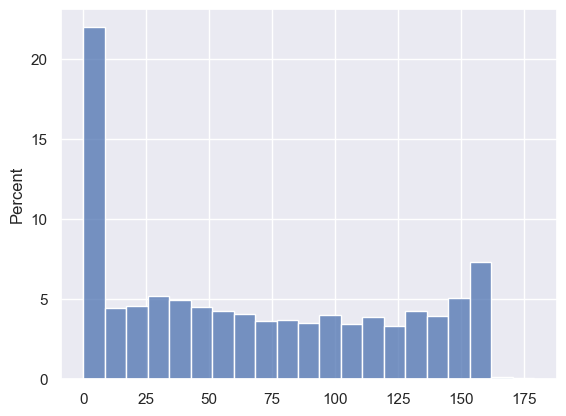

In [14]:
sns.histplot(gen_bio_lens, stat="percent")

In [15]:
pd.Series(prop_bio_lens).value_counts()

0      1172
30      106
29       94
22       85
31       83
       ... 
157       3
154       3
124       3
116       3
164       1
Name: count, Length: 161, dtype: int64

In [16]:
prop_users.user_profile_description.isna().value_counts()

user_profile_description
False    4757
True     1172
Name: count, dtype: int64

<Axes: ylabel='Percent'>

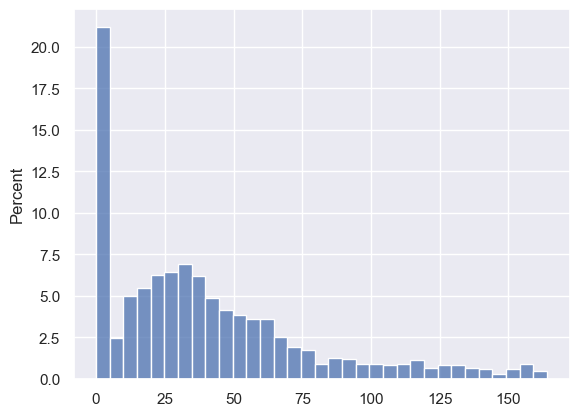

In [17]:
sns.histplot(prop_bio_lens, stat="percent")

Conclusion: No difference.


### Bio Number of Words


In [18]:
def process_tokenize(text):
    """Remove hashtags, urls, and emojis from bio and tokenize."""
    # links
    clean_text = re.sub(r"http\S+|t\.co/\S+", "", text)
    # mentions
    clean_text = re.sub(r"@\w+", "", clean_text)
    # hashtags
    clean_text = re.sub(r"#", "", clean_text)
    clean_text = re.sub(r"_", " ", clean_text)
    # tashqeel - from @bakriano
    clean_text = re.sub(r"[\u0617-\u061A\u064B-\u0652]", "", clean_text)
    # emojis
    clean_text = emoji.replace_emoji(clean_text, replace="")
    # remove new lines and normalize white spaces
    clean_text = re.sub(r"\s+", " ", clean_text)
    return word_tokenize(clean_text.strip())

In [19]:
gen_bio_words = [
    len(process_tokenize(b)) if not pd.isna(b) else 0
    for b in gen_users.user_profile_description
]
prop_bio_words = [
    len(process_tokenize(b)) if not pd.isna(b) else 0
    for b in prop_users.user_profile_description
]

In [20]:
pd.Series(gen_bio_words).value_counts()

0     2373
5      462
6      446
7      432
4      409
10     403
9      399
13     385
12     381
14     376
2      375
8      370
16     363
1      357
11     353
15     339
22     334
17     332
18     328
3      324
20     324
23     321
19     312
21     311
24     277
25     224
26     213
27     182
28     128
29     100
30      71
31      50
32      25
33      23
34      15
35      14
36       4
40       2
44       2
37       2
50       1
49       1
38       1
41       1
Name: count, dtype: int64

<Axes: ylabel='Percent'>

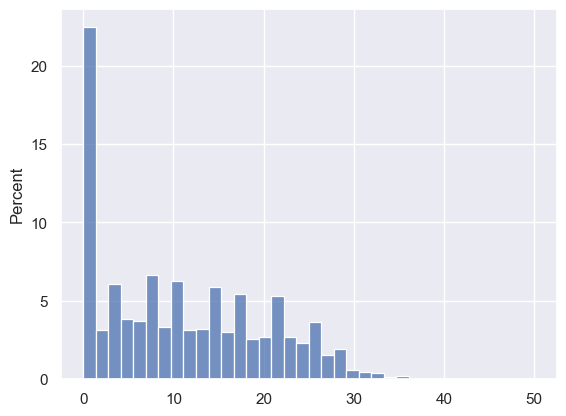

In [21]:
sns.histplot(gen_bio_words, stat="percent")

In [22]:
pd.Series(prop_bio_words).value_counts()

0     1224
6      414
4      381
5      374
7      358
8      335
3      302
9      298
2      259
11     248
10     235
13     187
12     187
1      162
14     132
15     106
17      89
16      86
19      77
18      74
21      51
20      48
25      43
22      41
23      40
24      36
27      30
26      27
28      23
29      14
31      11
30       9
34       5
32       5
33       4
38       3
35       2
36       2
46       1
71       1
37       1
45       1
50       1
47       1
59       1
Name: count, dtype: int64

<Axes: ylabel='Percent'>

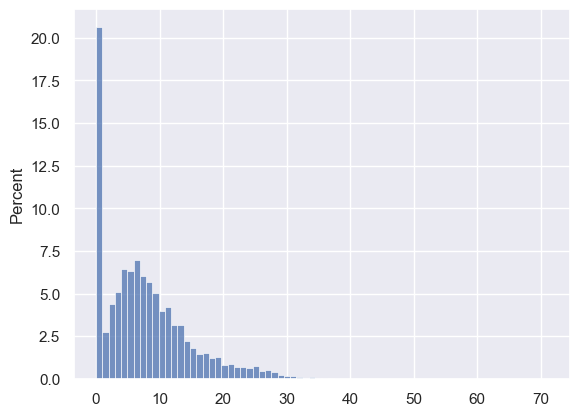

In [23]:
sns.histplot(prop_bio_words, stat="percent")

Conclusion: No difference.


### Bio Number of Emojis


In [24]:
from emoji import emoji_count

gen_bio_nem = [
    emoji_count(b) if not pd.isna(b) else 0 for b in gen_users.user_profile_description
]
prop_bio_nem = [
    emoji_count(b) if not pd.isna(b) else 0 for b in prop_users.user_profile_description
]

In [25]:
pd.Series(gen_bio_nem).value_counts()

0     10160
1      1002
2       504
3       195
4       119
5        50
6        35
7        27
8        19
9         8
10        6
13        5
11        3
15        2
12        2
16        2
33        1
35        1
19        1
22        1
24        1
14        1
Name: count, dtype: int64

<Axes: ylabel='Percent'>

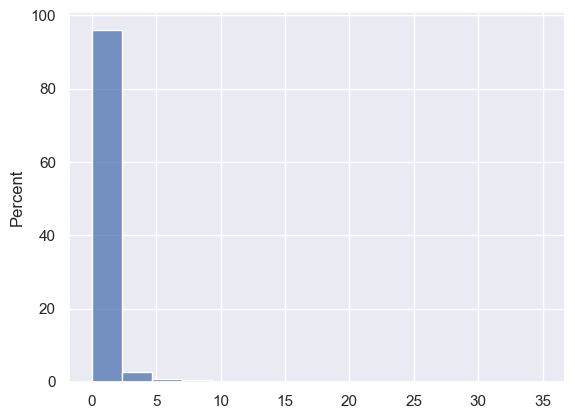

In [26]:
sns.histplot(gen_bio_nem, stat="percent")

In [27]:
pd.Series(prop_bio_nem).value_counts()

0     4798
1      692
2      269
3       92
4       39
5       16
8        6
7        5
6        4
9        3
10       2
14       1
13       1
11       1
Name: count, dtype: int64

<Axes: ylabel='Percent'>

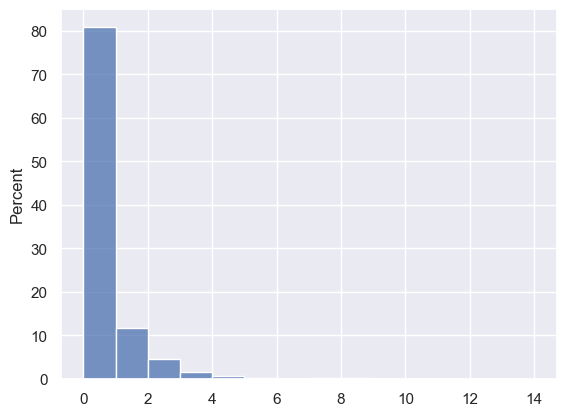

In [28]:
sns.histplot(prop_bio_nem, stat="percent")

Conclusion: both don't use emojis much in bios.


### Followers - Following Ratio


In [29]:
gen_follow_ratios, prop_follow_ratios = [], []

for _, r in gen_users.iterrows():
    ratio = r.follower_count / r.following_count if r.following_count != 0 else 0
    gen_follow_ratios.append(ratio)

for _, r in prop_users.iterrows():
    ratio = r.follower_count / r.following_count if r.following_count != 0 else 0
    prop_follow_ratios.append(ratio)

In [30]:
pd.Series(gen_follow_ratios).value_counts()

0.000000       527
0.250000        28
1.000000        21
0.166667        18
0.500000        16
              ... 
1.614286         1
15.837995        1
5313.718805      1
2.587131         1
449.500000       1
Name: count, Length: 10805, dtype: int64

In [31]:
gen_users.following_count.value_counts()[0]

261

<Axes: ylabel='Percent'>

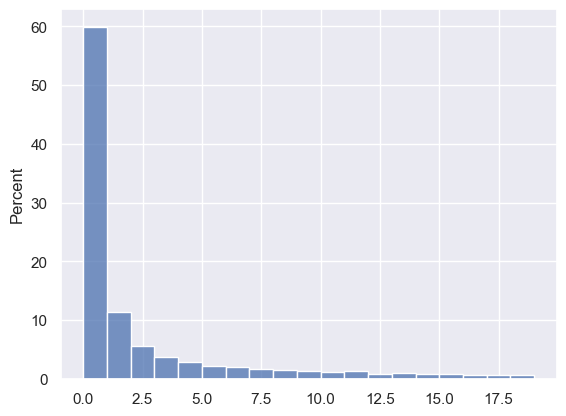

In [32]:
sns.histplot(gen_follow_ratios, bins=np.arange(0, 20, 1), stat="percent")

In [33]:
pd.Series(prop_follow_ratios).value_counts()

0.000000    218
0.250000     25
0.500000     23
0.090909     20
0.066667     20
           ... 
1.061824      1
0.829482      1
0.910569      1
0.371601      1
0.680233      1
Name: count, Length: 4605, dtype: int64

In [34]:
prop_users.following_count.value_counts()[0]

197

<Axes: ylabel='Percent'>

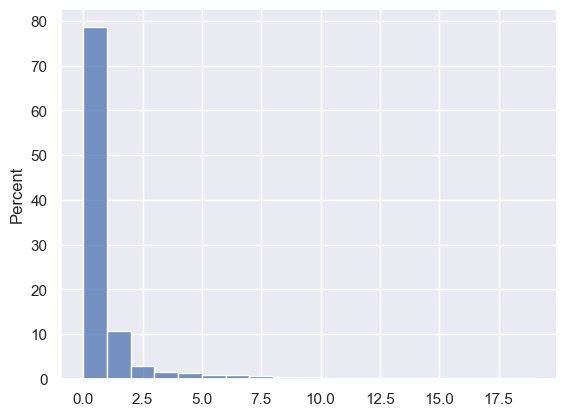

In [35]:
sns.histplot(prop_follow_ratios, bins=np.arange(0, 20, 1), stat="percent")

Conclusion: almost no difference.


### Bio words count


In [36]:
gen_words, prop_words = [], []

for _, r in gen_users.iterrows():
    if not pd.isna(r.user_profile_description):
        gen_words.extend(process_tokenize(r.user_profile_description))

for _, r in prop_users.iterrows():
    if not pd.isna(r.user_profile_description):
        prop_words.extend(process_tokenize(r.user_profile_description))

In [37]:
pd.Series(gen_words).value_counts()[:50]

.           2819
في          2250
|           1731
..          1586
من          1391
,           1156
(           1086
)           1077
:            977
-            966
of           940
و            784
،            780
الله         776
على          749
الحساب       740
الرسمي       735
لا           588
the          537
السعودية     522
and          477
عضو          406
&            403
حساب         396
in           380
ما           344
كل           322
رئيس         317
...          314
The          302
!            301
عن           297
العربية      293
السعودي      282
كاتب         273
Saudi        272
for          271
``           268
مهتم         261
اللهم        258
''           237
مجلس         234
أن           231
مع           222
account      222
مصر          218
to           216
إدارة        212
صحيفة        212
للتواصل      208
Name: count, dtype: int64

In [38]:
pd.Series(prop_words).value_counts()[:50]

.         872
..        845
من        740
في        602
الله      536
لا        520
،         382
!         330
و         322
على       283
ما        277
:         267
كل        266
,         231
اللهم     193
أن        193
)         173
⠀         168
(         164
عن        157
لي        154
ولا       137
...       127
-         123
ان        109
الحياة    106
الا       106
|         106
``        104
سبحان     104
جامعة      96
إلا        95
هو         88
لم         86
''         83
لك         83
يا         82
شيء        81
*          76
الملك      72
⠀⠀         67
ثم         67
انا        67
أنا        66
الناس      65
حتى        64
كنت        64
هنا        62
إن         59
العظيم     58
Name: count, dtype: int64

Conclusion: genuine accounts tend to use the following keywords a lot in the bios:
`الحساب` - `الرسمي` - `عضو` - `رئيس` - `كاتب` - `إدارة`


### Account Creation Year


In [39]:
gen_years = [d.year for d in gen_users.account_creation_date]
prop_years = [d.year for d in prop_users.account_creation_date]

In [40]:
pd.Series(gen_years).value_counts()

2011    2218
2012    1801
2013    1047
2019     941
2020     883
2018     800
2016     766
2014     751
2017     731
2015     614
2021     525
2010     501
2009     353
2022     129
2008      67
2007      15
2006       3
Name: count, dtype: int64

<Axes: ylabel='Percent'>

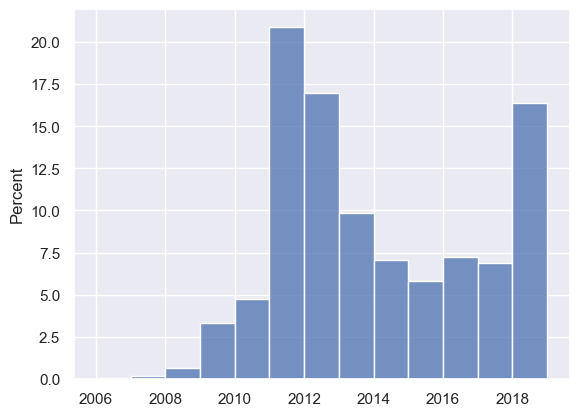

In [41]:
bins = list(filter(lambda x: x not in [2020, 2021, 2022], np.unique(gen_years)))
sns.histplot(gen_years, bins=bins, stat="percent")

In [42]:
pd.Series(prop_years).value_counts()

2019    1500
2018    1175
2017    1070
2016     456
2013     429
2014     404
2012     398
2015     215
2011     159
2010      70
2009      35
2008      12
2007       6
Name: count, dtype: int64

<Axes: ylabel='Percent'>

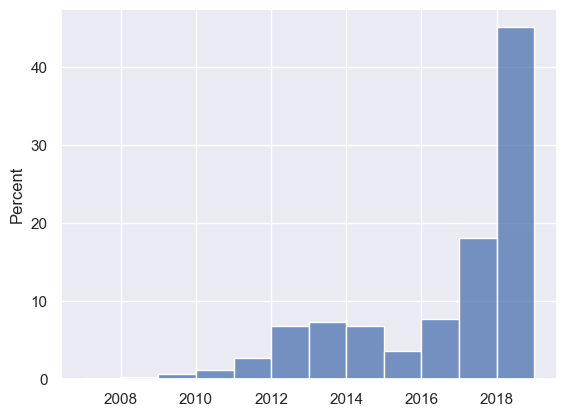

In [43]:
sns.histplot(prop_years, bins=np.unique(prop_years), stat="percent")

Conclusion:

- most genuine accounts were created in 2011 and 2012.
- most propagandist accounts were creaetd in 2018 and 2019.


### User Location


Is there a location or not?


In [44]:
gen_users.user_reported_location.isna().value_counts()

user_reported_location
False    7871
True     4274
Name: count, dtype: int64

In [45]:
prop_users.user_reported_location.isna().value_counts()

user_reported_location
False    3426
True     2503
Name: count, dtype: int64

Is it a valid location?


In [46]:
# donwload language models
stanza.download("ar")
stanza.download("en")

# initialize engines
arnlp = stanza.Pipeline("ar", verbose=False, download_method=None)
ennlp = stanza.Pipeline("en", verbose=False, download_method=None)

2023-10-26 00:58:04 INFO: Downloading default packages for language: ar (Arabic) ...
2023-10-26 00:58:06 INFO: File exists: C:\Users\ehhho\stanza_resources\ar\default.zip
2023-10-26 00:58:09 INFO: Finished downloading models and saved to C:\Users\ehhho\stanza_resources.


2023-10-26 00:58:10 INFO: Downloading default packages for language: en (English) ...
2023-10-26 00:58:12 INFO: File exists: C:\Users\ehhho\stanza_resources\en\default.zip
2023-10-26 00:58:17 INFO: Finished downloading models and saved to C:\Users\ehhho\stanza_resources.


In [47]:
gen_loc_status, prop_loc_status = [], []

for _, r in tqdm(gen_users.iterrows(), total=len(gen_users)):
    if pd.isna(r.user_reported_location):
        gen_loc_status.append(False)
        continue
    ents = [e in ["GPE", "LOC"] for e in arnlp(r.user_reported_location).entities]
    ents += [e in ["GPE", "LOC"] for e in ennlp(r.user_reported_location).entities]
    gen_loc_status.append(bool(ents))

for _, r in tqdm(prop_users.iterrows(), total=len(prop_users)):
    if pd.isna(r.user_reported_location):
        prop_loc_status.append(False)
        continue
    ents = [e in ["GPE", "LOC"] for e in arnlp(r.user_reported_location).entities]
    ents += [e in ["GPE", "LOC"] for e in ennlp(r.user_reported_location).entities]
    prop_loc_status.append(bool(ents))

  0%|          | 0/12145 [00:00<?, ?it/s]

  0%|          | 0/5929 [00:00<?, ?it/s]

In [48]:
pd.Series(gen_loc_status).value_counts()

True     7113
False    5032
Name: count, dtype: int64

In [49]:
pd.Series(prop_loc_status).value_counts()

True     3131
False    2798
Name: count, dtype: int64

Conclusion: No difference.


### Conclusion

- Propagandist users accounts were created in `2018` and `2019`.
- Genuine users accounts were created in `2011` and `2012`.
- Genuine users use the words `الحساب` and `الرسمي` and others mentioned above in their bios.
